# I. Gradient Descent Multivariat

In [1]:
import numpy as np
from numpy import dot
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
table = np.genfromtxt('data_multivariat.txt', delimiter=',')

X = table[:, 0:2]
y = table[:, -1]

## A. Fungsi Perhitungan Gradient Descent

Buat suatu fungsi berisi algoritma Gradient Descent untuk menghitung parameter model linear dengan $n$ fitur dan $m$ instance data berikut:

$$
h_\mathbf{\theta}(\mathbf{x}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_2x_2.
$$

Input fungsi adalah sebagai berikut:
* Matriks $X$ berukuran $m\times n$. Elemen baris ke $i$ dan kolom ke $j$ dari matriks, yaitu $x^{(i)}_j$, adalah instance ke $i$ dari data latih pada fitur ke $j$, untuk setiap $i=1,2,\dots, m$ dan $j=1,2,\dots,n$.
* Vektor $y$ berukuran $m$. Elemen ke $i$ dari vektor $y$, yaitu $y^{(i)}$ adalah nilai variabel output untuk instance data ke $i$, untuk setiap $i=1,2,\dots, m$.
* ```NumIterations```, yaitu banyaknya perulangan yang dilakukan pada algoritma Gradient Descent.
* ```alpha```, yaitu besarnya *learning rate*.

Output fungsi adalah sebuah matriks $\Theta$ berukuran ```NumIterations```$\times (n+1)$. Elemen pada baris ke $k$ dan kolom ke $j$ dari matriks tersebut, yaitu $\theta_{kj}$, adalah parameter ke $j$ dari model linear yang diperoleh pada iterasi ke $k$ dari algoritma Gradient Descent; untuk semua $j=0,1,\dots,n$ dan $k=1,2,\dots,$```NumIterations```.

In [3]:
# Manual Grad Descent

numIterations = 10000
alpha = 1e-7

def hypothesis(theta0, theta1, theta2, x1, x2):
    return theta0 + theta1 * x1 + theta2 * x2 

def GradDesc(X, y, numIterations, alpha):
    # modifikasi matriks X agar memuat nilai x_0 dummy untuk setiap instance data
    X = np.insert(X, 0, 1, axis=1)
    m, n = np.shape(X)
    # gunakan nilai theta awal semua nilainya 0
    theta0 = [0]
    theta1 = [0]
    theta2 = [0]
    
    x0 = X.T[0]
    x1 = X.T[1]
    x2 = X.T[2]
    for i in range(numIterations):
        theta0.append(theta0[i] - (alpha * (1/m) * np.sum(hypothesis(theta0[i], theta1[i], theta2[i], x1, x2) - y)))
        theta1.append(theta1[i] - (alpha * (1/m) * np.sum((hypothesis(theta0[i], theta1[i], theta2[i], x1, x2) - y) * x1)))
        theta2.append(theta2[i] - (alpha * (1/m) * np.sum((hypothesis(theta0[i], theta1[i], theta2[i], x1, x2) - y) * x2)))
    
    return theta0, theta1, theta2

theta0, theta1, theta2 = GradDesc(X, y, numIterations, alpha)

Theta = np.array([theta0, theta1, theta2]).T
print(Theta)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.40412660e-02 7.64209128e+01 1.12036770e-01]
 [5.27931073e-02 1.17528875e+02 1.73069931e-01]
 ...
 [9.60026936e+00 1.65354770e+02 1.68224004e+01]
 [9.60122212e+00 1.65354767e+02 1.68240581e+01]
 [9.60217488e+00 1.65354765e+02 1.68257159e+01]]


## B. Versi Tervektorisasi
Buatlah algoritma Gradient Descent dalam bentuk yang tervektorisasi (semua operasi didefinisikan dalam operasi vektor dan matriks).

Pada setiap iterasinya, ketika mengkomputasi nilai gradien sebagai berikut:

$$
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_j}= \dfrac{1}{m}\sum\limits_{i=1}^m(h_{\mathbf{\theta}}(\mathbf{x}^{(i)})-y^{(i)})x_j^{(i)}, \qquad \text{ untuk semua }j=0,1,\dots m,
$$

keseluruhan perhitungan sebetulnya dapat diekspresikan sebagai beberapa operasi matriks. Misalkan kita definisikan beberapa notasi berikut.

$$
\mathbf{\Theta}=\begin{bmatrix}
\theta_0\\ 
\theta_1\\ 
\vdots \\
\theta_n
\end{bmatrix}, \qquad
\nabla J = \begin{bmatrix}
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_0}\\
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_1}\\
\vdots \\
\dfrac{\partial J(\mathbf{\Theta})}{\partial \theta_n}
\end{bmatrix}.
$$

Maka, (cek!)

$$
\nabla J = X^T(X\mathbf{\Theta}-\mathbf{y})/m
$$

Sehingga perhitungan update nilai $\theta$ dapat dilakukan dalam bentuk vektor sebagai berikut:

$$
\mathbf{\Theta} := \mathbf{\Theta} - \alpha \nabla J.
$$

Perhitungan dengan bentuk vektor semacam ini memiliki keuntungan sebagai berikut:
* Penulisan kode menjadi sangat ringkas. (perhitungan di atas dapat ditulis hanya dengan 1 baris kode saja)
* Perhitungan dengan Numpy telah teroptimisasi untuk perhitungan operasi matriks. Artinya, running time algoritma yang ditulis dalam bentuk tervektorisasi (semuanya murni dalam operasi matriks/vektor) akan secara signifikan jauh lebih cepat dibanding perhitungan yang dilakukan dengan menggunakan desain for-loop manual.

In [4]:
# Vectorised Grad Descent

numIterations = 10000
alpha = 1e-7

def GradDescVect(X, y, numIterations, alpha):
    # modifikasi matriks X agar memuat nilai x_0 dummy untuk setiap instance data
    X = np.insert(X, 0, 1, axis=1)
    m, n = np.shape(X)
    # gunakan nilai theta awal semua nilainya 0
    theta = [np.array([0]*n)]
    
    for i in range(numIterations):
        ### tuliskan algoritma gradient descent di sini
        theta.append(theta[i] - alpha * (1/m) * X.T.dot(X.dot(theta[i]) - y)) 
        ### Tantangan: tuliskan keseluruhan perhitungan hanya dalam 1 baris saja
    
    Theta = np.array(theta)
    return Theta

Theta = GradDescVect(X, y, numIterations, alpha)
print(Theta)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.40412660e-02 7.64209128e+01 1.12036770e-01]
 [5.27931073e-02 1.17528875e+02 1.73069931e-01]
 ...
 [9.60026936e+00 1.65354770e+02 1.68224004e+01]
 [9.60122212e+00 1.65354767e+02 1.68240581e+01]
 [9.60217488e+00 1.65354765e+02 1.68257159e+01]]


Bandingkan waktu performa kedua algoritma tersebut. Buatlah kesimpulan.

### Kesimpulan:

Running time algoritma yang ditulis dalam bentuk tervektorisasi secara signifikan jauh lebih cepat dibanding perhitungan yang dilakukan dengan menggunakan desain for-loop manual serta lebih efisien karena ditulis hanya dengan satu baris kode.

## C. Fungsi Plot 3D

Buatlah fungsi untuk membuat plot 3 dimensi untuk regresi linear dengan dua fitur (plot tidak bisa dibuat untuk data latih dengan lebih dari 2 fitur).

Input:
* Matriks $X$ berukuran $m\times 2$. Elemen baris ke $i$ dan kolom ke $j$ dari matriks, yaitu $x^{(i)}_j$, adalah instance ke $i$ dari data latih pada fitur ke $j$, untuk setiap $i=1,2,\dots, m$ dan $j=1,2,\dots,n$.
* Vektor $\mathbf{y}$ berukuran $m$. Elemen ke $i$ dari vektor $y$, yaitu $y^{(i)}$ adalah nilai variabel output untuk instance data ke $i$, untuk setiap $i=1,2,\dots, m$.
* vektor $\mathbf{\Theta}$ berukuran 3.

Output:
Sebuah grafik 3D yang berisi:
* Scatter plot titik-titik data latih $X$ dan $\mathbf{y}$.
* Bidang linear hasil model regresi dengan $\mathbf{\Theta}$ sebagai parameter-parameternya.

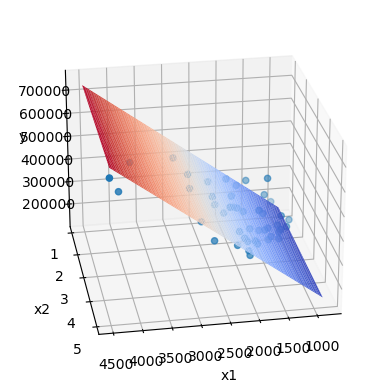

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_solution(X, y, theta):
    
    # Definisikan fungsi yang hendak diplot (fungsi hipotesis)
    def f(x1, x2, theta):
        return theta[0] + (theta[1] * x1) + (theta[2] * x2)
    
    # Tentukan batas nilai yang akan ditampilkan di sumbu
    x_lin = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 200)
    y_lin = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 200)

    Xgrid, Ygrid = np.meshgrid(x_lin, y_lin)
    Z = f(Xgrid, Ygrid, theta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y)
    ax.plot_surface(Xgrid, Ygrid, Z, cmap=cm.coolwarm)#, linewidth=0, antialiased=False)
    ax.view_init(25, 80)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y');
    plt.show()

plot_solution(X, y, Theta[-1, :])

## D. Feature Scaling

Implementasikan kembali algoritma Gradient Descent dengan menerapkan teknik preprocessing Feature Scaling.

Setiap instance dari masing-masing fitur akan ditransformasi (diubah nilainya) dengan tujuan agar range nilai data dari masing-masing fitur terseragamkan.

$$
\hat{x}_j^{(i)}:= \dfrac{x_j^{(i)}-\mu_{\mathbf{x}_j}}{\sigma_{\mathbf{x}_j}}, \quad \text{ untuk }j=0, 1, \dots, n.
$$
di mana $\mu_{\mathbf{x}_j}$ dan $\sigma_{\mathbf{x}_j}$ secara berturut-turut adalah rata-rata dan standar deviasi dari semua instace data pada nilai fitur ke $j$ nya.

Teknik di atas disebut sebagai **Normalisasi**. Akan terdapat teknik feature scaling lainnya yang tidak dibahas dalam bagian ini.

**Catatan:** Data yang perlu diskalakan hanya variabel input saja. Nilai variabel output tidak perlu diskalakan.

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

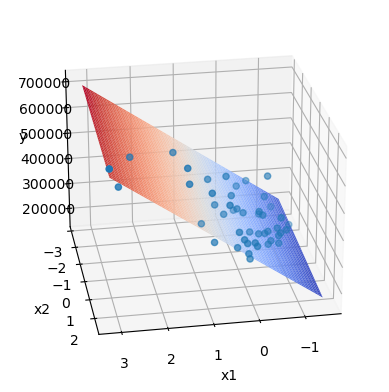

In [6]:
def feature_scaling(X):
    ### Tuliskan algoritma untuk melakukan normalisasi di sini
    X_scaled = np.copy(X)
    for i in range(X.shape[1]):
        mean = np.mean(X[:,i])
        std = np.std(X[:,i])
        X_scaled[:,i] = (X[:,i] - mean) / std
    return X_scaled
    ###

X_scaled = feature_scaling(X)
print(X_scaled)
# alpha dan NumIterations ditentukan secara spesifik; silakan memodifikasi untuk eksplorasi
Theta_scaled = GradDescVect(X_scaled, y, 10000, 1e-2)
print(Theta_scaled)
plot_solution(X_scaled, y, Theta_scaled[-1, :])

## E. Evaluasi model dengan Fungsi Biaya

Ingat kembali fungsi biaya
$$
J(\theta_0, \dots, \theta_n) = \dfrac{1}{2m}\sum_{i=1}^m(h_{\mathbf{\theta}}(x_0^{(i)}, x_1^{(i)}, \dots, x_n^{(i)})-y^{(i)})^2.
$$

Kita akan menggunakan fungsi biaya tersebut untuk membandingkan model yang dihasilkan dengan dan tanpa teknik feature scaling. Untuk membandingkannya, buatlah grafik nilai fungsi biaya terhadap iterasi untuk kedua algoritma gradient descent. Agar perbedaan terlihat dengan jelas, **jangan masukkan nilai fungsi biaya untuk 100 iterasi pertama**, karena nilainya terlalu besar.

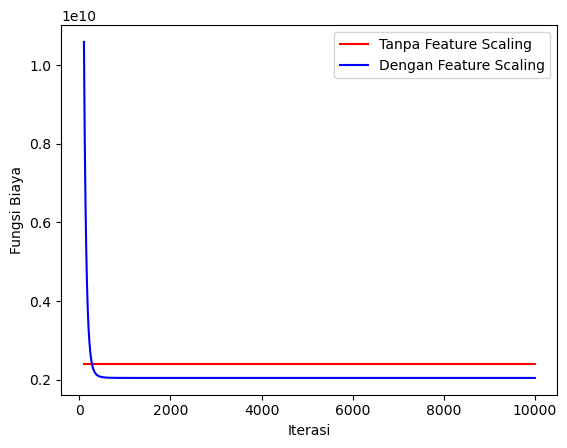

In [7]:
def cost_function(X, y, theta):
    ### Tuliskan algoritma untuk menghitung fungsi biaya di sini
    X = np.insert(X, 0, 1, axis=1)
    m = len(y)
    return 1/(2*m)*np.sum((X.dot(theta.T) - y)**2)
    
# Simpan nilai fungsi biaya untuk seluruh iterasi.

cost_without = [cost_function(X, y, Theta[i]) for i in range(numIterations + 1)]
cost_with = [cost_function(X_scaled, y, Theta_scaled[i]) for i in range(numIterations + 1)]
x_plot = range(len(Theta))

# Plot nilai fungsi biaya dengan menghapus data untuk 100 iterasi pertama
plt.plot(x_plot[100:], cost_without[100:], 'r', label = 'Tanpa Feature Scaling')
plt.plot(x_plot[100:], cost_with[100:], 'b', label = 'Dengan Feature Scaling')
plt.legend()
plt.xlabel("Iterasi")
plt.ylabel("Fungsi Biaya")
plt.show()

Tuliskan kesimpulan atas hasil yang Anda peroleh.

### Kesimpulan:

Penggunaan feature scaling dapat mempercepat konvergensi model sehingga diperoleh hasil yang lebih akurat dalam waktu yang lebih cepat, maka rentang nilai dari setiap variabel akan diubah sehingga memiliki skala yang sama. Ini akan membantu menghindari masalah yang terjadi ketika variabel memiliki rentang nilai yang berbeda-beda.

# II. Regresi Linear dengan data Real

Dalam tugas ini, Anda akan mengolah data klaim asuransi serta membangun model Regresi Linear untuk memprediksi besarnya klaim asuransi yang perlu disiapkan oleh perusahaan asuransi ketika menerima nasabah baru.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [9]:
data = pd.read_csv("insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## A. Visualisasi Data berdimensi Tinggi

Sebelum menjalankan Regresi Linear, pada umumnya kita perlu memahami natur datanya untuk memastikan bahwa Regresi Linear memang adalah teknik yang tepat untuk jenis data tersebut. Hal ini biasanya dilakukan dengan menggambar grafik datanya. Namun demikian, hal ini menjadi kesulitan ketika data yang perlu digambar memiliki dimensi yang terlalu besar. Untuk mengatasi hal ini, library Seaborn memiliki fitur yang dapat membantu.

Perhatikan contoh berikut.

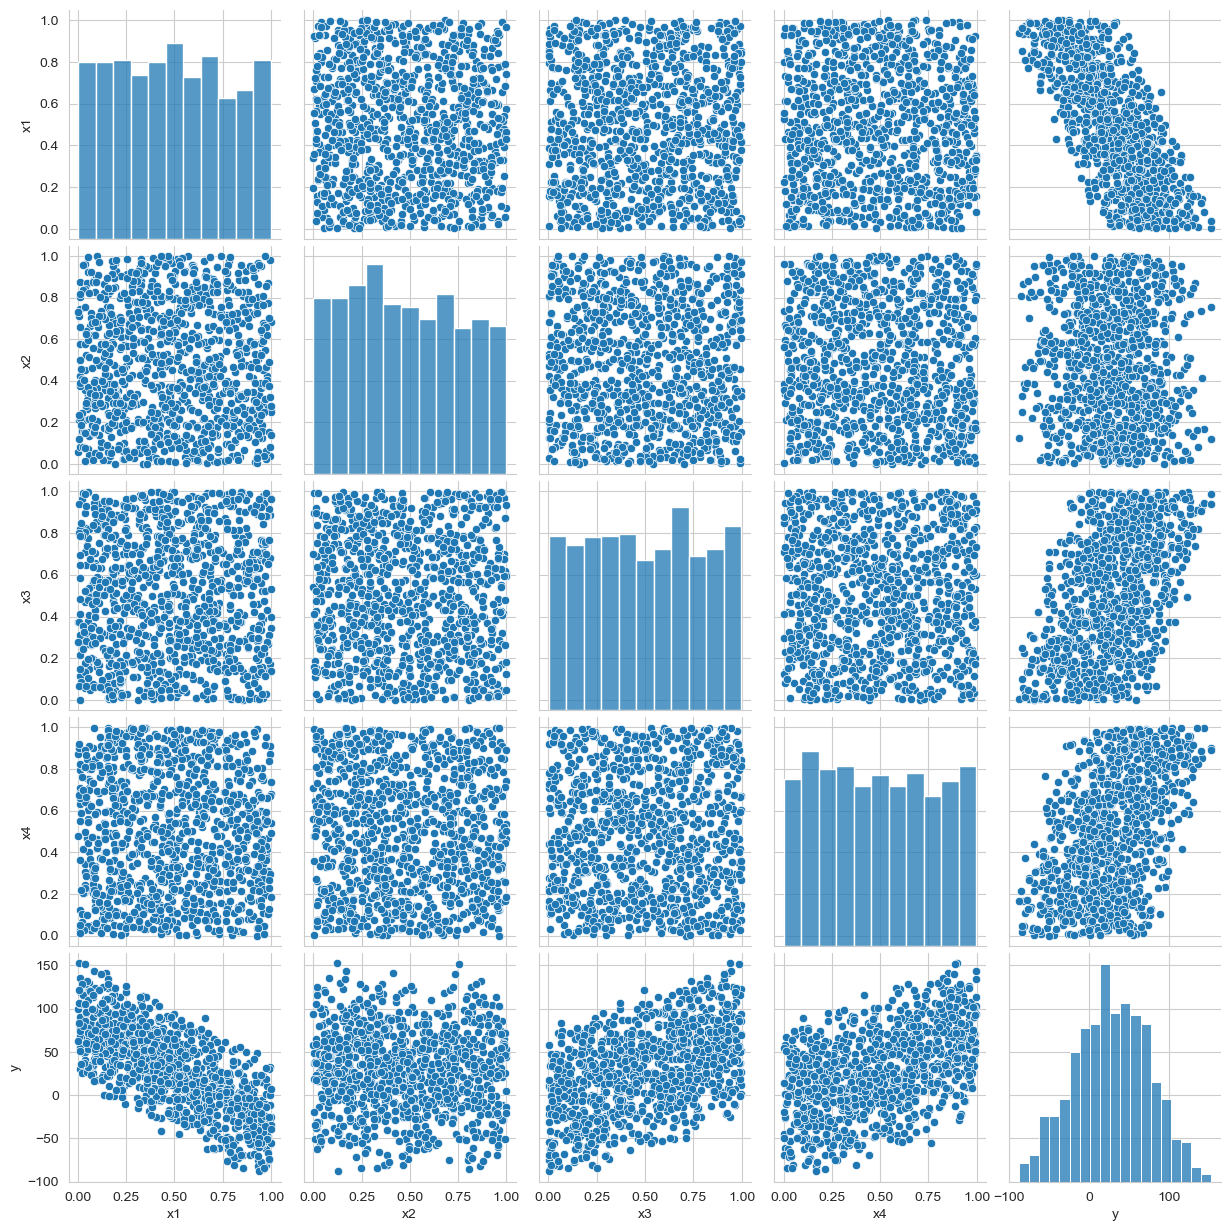

In [10]:
# Kode berikut membangkitkan data acak multidimensi
n = 1000
Xr = np.random.rand(4, n)
y = 10 - 120 * Xr[0, :] + 80 * Xr[2, :] + 75 * Xr[3, :] + 4 * np.random.normal(0, 1, n)
d = {
    "x1": pd.Series(Xr[0, :], index=range(n)),
    "x2": pd.Series(Xr[1, :], index=range(n)),
    "x3": pd.Series(Xr[2, :], index=range(n)),
    "x4": pd.Series(Xr[3, :], index=range(n)),
    "y": pd.Series(y, index=range(n)),
}
df_dumm = pd.DataFrame(d)
df_dumm

# Kode berikut memanggil fitur Seaborn untuk membandingkan hubungan antara fitur
sns.set_style("whitegrid")
sns.pairplot(df_dumm[["x1", "x2", "x3", "x4", "y"]])

**Penjelasan:**
* Terdapat 25 grafik, yang masing-masing merupakan grafik scatter plot untuk setiap dua fitur berbeda dan sebuah histogram untuk dua fitur yang sama (elemen diagonalnya)
* Perhatikan bahwa setiap pasangan nilai $x$ pada grafik di atas terlihat menyebar rata dan seperti tidak ada pola tertentu.
* Namun grafik antara suatu nilai $x$ tertentu dengan $y$ menunjukkan suatu hubungan seperti garis lurus. Artinya masuk akal untuk membuat suatu regresi linear dengan variabel $x$ sebagai inputnya dan $y$ sebagai outputnya.

### Tugas:
Buatlah visualisasi data seperti di atas untuk data klaim asuransi. Ingat bahwa data yang dapat digambar grafiknya hanya data yang bersifat numerik.

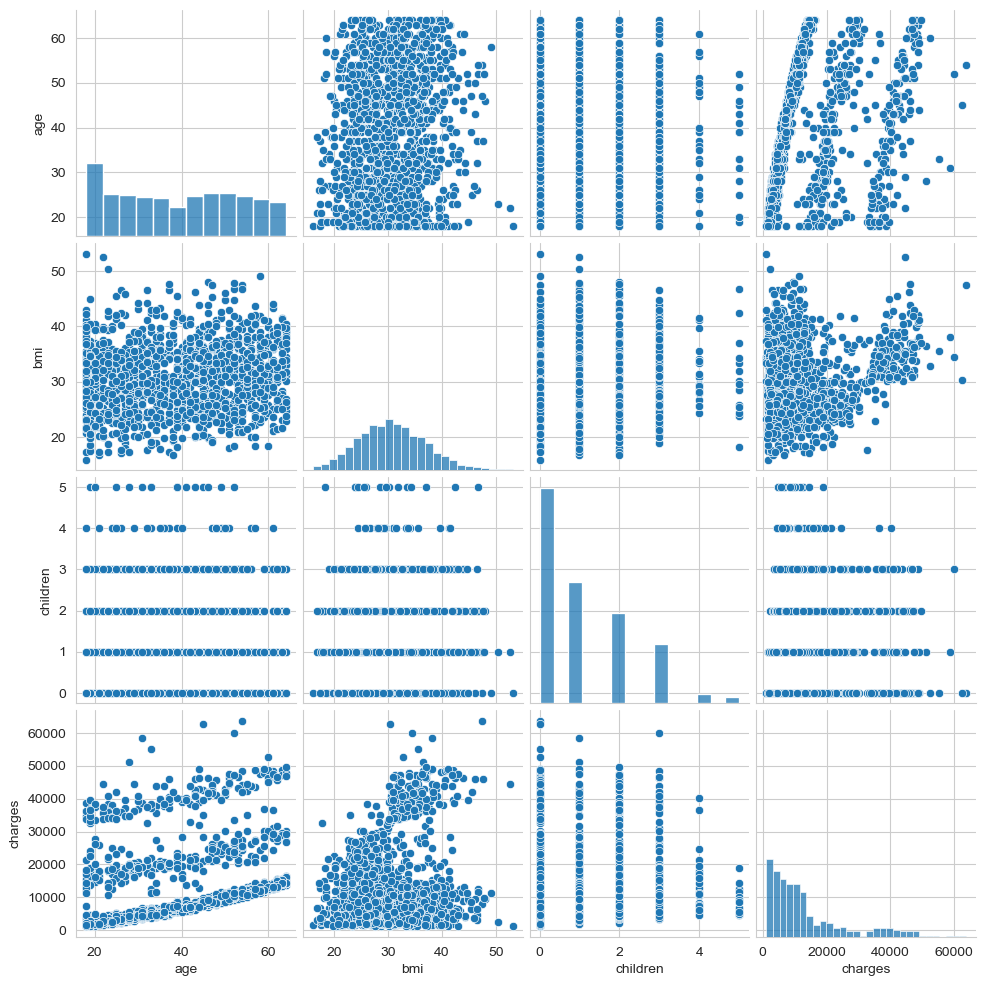

In [11]:
### Tuliskan kode di sini
sns.set_style("whitegrid")
sns.pairplot(data, vars=['age', 'bmi', 'children', 'charges'])
###

## B. One Hot Encoding untuk Data Kategorial

Dalam data di dunia nyata, seringkali terdapat data yang bersifat kategorial dan bersifat tidak kuantitatif. Data semacam ini tidak bisa diproses oleh tugas Regresi Linear. Namun demikian, seringkali data seperti ini justru memiliki pengaruh yang signifikan terhadap luaran yang diharapkan. Misalkan dalam kasus klaim asuransi, tentu nasabah yang merupakan perokok memiliki kecenderungan untuk memiliki klaim yang lebih besar dibanding nasabah non perokok, karena nasabah perokok biasanya memiliki kesehatan yang cenderung lebih buruk.

Oleh sebab itu, suatu teknik preprocessing perlu dilakukan untuk mengatasi permasalahan ini. Salah satu teknik yang paling umum digunakan adalah teknik *One Hot Encoding*, di mana suatu fitur bertipe data kategorial dengan $k$ buah kategori berbeda akan 'dimekarkan' menjadi $k$ buah fitur baru.

Perhatikan contoh berikut.

In [12]:
d = {
    "Tinggi Badan": pd.Series([174.3, 152.5, 163.2, 159.0], index=range(4)),
    "Berat Badan": pd.Series([74.6, 52.2, 63.1, 61.0], index=range(4)),
    "Jenis Kelamin": pd.Series(["Laki-laki", "Perempuan", "Perempuan", "Laki-laki"], index=range(4)),
    "Prodi": pd.Series(["IBDA", "IEE", "IEE", "CFP"], index=range(4)),
}
df = pd.DataFrame(d)
df

,Tinggi Badan,Berat Badan,Jenis Kelamin,Prodi
0,174.3,74.6,Laki-laki,IBDA
1,152.5,52.2,Perempuan,IEE
2,163.2,63.1,Perempuan,IEE
3,159.0,61.0,Laki-laki,CFP


Kode berikut menjalankan teknik one-hot-encoding untuk mengubah semua data kategorial menjadi vektor encoding. Jalankan kode berikut dan pelajari maksud dari teknik ini. Jawablah pertanyaan di bawah ini untuk meningkatkan pemahaman Anda.

In [13]:
df = pd.get_dummies(df)
df

,Tinggi Badan,Berat Badan,Jenis Kelamin_Laki-laki,Jenis Kelamin_Perempuan,Prodi_CFP,Prodi_IBDA,Prodi_IEE
0,174.3,74.6,1,0,0,1,0
1,152.5,52.2,0,1,0,0,1
2,163.2,63.1,0,1,0,0,1
3,159.0,61.0,1,0,1,0,0


Pertanyaan:
1. Setelah dilakukan proses di atas, apakah terjadi perubahan jumlah fitur dalam tabel DataFrame? Ada berapa tambahan fitur yang terjadi?
2. Apa yang menentukan seberapa banyak tambahan fitur tambahan yang diberikan?
3. Apa makna angka 0 dan 1 yang muncul dari kolom fitur yang baru?
4. Untuk setiap baris, mungkinkah semua kolom fitur baru terisi angka 1 semuanya?
5. Untuk setiap baris, mungkinkah semua kolom fitur baru terisi angka 0 semuanya?

Jawaban:
1. Jumlah fiture dalam tabel DataFrame bertambah sebanyak 7 fitur.
2. Yang menentukan banyaknya tambahan fitur tambahan yang diberikan adalah pada tahap preprocessing menggunakan teknik One Hot Encoding.
3. Angka 0 berarti False, sedangkan angka 1 berarti True.
4. Tidak mungkin. 
5. Mungkin jika ada kesalahan pada data.

### Tugas:
Lakukan teknik preprocessing One-Hot-Encoding untuk tabel asuransi.

In [14]:
### Tuliskan kode di sini
data_encoded = pd.get_dummies(data)
data_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## C. Regresi Linear dengan SK Learn

Berikut langkah-langkah utama yang dilakukan dalam implementasi Regresi Linear dengan kasus nyata:
1. Mendefinisikan variabel input dan ouput ke dalam dua kelompok: a) Data Latih, dan b) Data Uji.
2. Membangun model Regresi Linear dengan SK Learn.
3. Mengevaluasi hasil pembangunan model dengan mengujikan hasil prediksi model ke set Data Uji.
4. Men-deploy model untuk melakukan prediksi.

Akan diberikan contoh melakukan langkah-langkah di atas untuk data ```df_dumm``` seperti di atas. 

**Tugas Anda adalah mereplikasi langkah-langkah tersebut untuk data Klaim Asuransi.**

### C1. Pengelompokan variabel input dan output

Dalam praktek regresi linear, data set yang dimiliki biasanya tidak semuanya digunakan sebagai data latih. Terdapat beberapa di antaranya yang sengaja tidak dimasukkan dalam set data latih untuk memenuhi kebutuhan lain. Dalam modul ini kita hanya akan membahas adanya set data yang akan digunakan sebagai **data uji**, yang tidak termasuk dalam set data latih. Set data uji akan digunakan untuk menguji hasil model yang sudah dilatih dengan menggunakan data latih.

Dalam contoh kali ini, kita akan membagi 1000 instance data ```df_dumm``` secara acak menjadi:
1. 80% di antaranya sebagai **Data Latih**
2. 20% sisanya sebagai **Data Uji**

In [15]:
from sklearn.model_selection import train_test_split

# definisikan keseluruhan variabel input dan output terlebih dahulu
y = df_dumm[["y"]]
X = df_dumm.drop("y", axis = 1)

# pecah dataset ke dalam dua kelompok secara acak
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=1)
# random state dipilih = 1, untuk memberikan suatu realisasi keacakan, namun keacakan tersebut bernilai tetap untuk setiap keberjalanan algoritma

# Berikut adalah Data Latih berisi 800 instance
display(X_train)
display(y_train)

# Berikut adalah Data Uji berisi 200 instance
display(X_test)
display(y_test)

,x1,x2,x3,x4
382,0.707018,0.601480,0.771292,0.650179
994,0.698743,0.382739,0.191133,0.314070
982,0.322528,0.429262,0.892599,0.869087
47,0.502771,0.798651,0.749453,0.438055
521,0.218748,0.554707,0.083610,0.213172
...,...,...,...,...
767,0.881622,0.794155,0.254362,0.316545
72,0.932459,0.802126,0.004867,0.276109
908,0.330012,0.965940,0.421795,0.427267
235,0.059653,0.215971,0.147044,0.752074


,y
382,31.012382
994,-40.519029
982,113.783403
47,44.076260
521,10.061750
...,...
767,-52.380963
72,-75.158724
908,41.920573
235,74.239077


,x1,x2,x3,x4
507,0.962053,0.382545,0.225002,0.047324
818,0.624729,0.249215,0.272061,0.448218
452,0.786402,0.862586,0.932335,0.299583
368,0.118016,0.481188,0.295918,0.810403
242,0.023746,0.409327,0.961846,0.102026
...,...,...,...,...
430,0.118354,0.576644,0.873427,0.013150
874,0.770135,0.143818,0.818355,0.445584
550,0.765329,0.541817,0.221007,0.142368
608,0.879064,0.700182,0.611158,0.627943


,y
507,-81.084441
818,-8.482394
452,7.802269
368,77.180669
242,88.821583
...,...
430,67.083268
874,25.787110
550,-54.986196
608,-2.179097


### C2. Membangun model Regresi Linear

Regresi linear dapat dikerjakan dengan memanggil perintah berikut.

In [16]:
from sklearn.linear_model import LinearRegression

# lr adalah sebuah variabel yang namanya bebas boleh diganti apapun (silakan coba)
lr = LinearRegression()
lr.fit(X_train, y_train)
# Setelah kode ini dijalankan, objek lr sudah selesai menjalankan Regresi Linear dan semua informasi mengenai hasil Regresi sudah tersimpan di sana.

# Ekstrak nilai parameter theta dari model linear
theta0 = lr.intercept_
[theta_lainnya] = lr.coef_
theta = np.append(theta0, theta_lainnya)
print(theta)

[  10.33675485 -120.03006454    0.17101603   79.2231761    74.97143843]


### C3. Mengevaluasi Model hasil Pelatihan

SK Learn memiliki method khusus yang dapat mengembalikan suatu skor untuk mengevaluasi seberapa baik model yang sudah dibuat. Skor tersebut memiliki nilai terendah $0.0$ dan nilai tertinggi $1.0$ dengan semakin besar skor menandakan model bekerja semakin baik.

In [17]:
# panggil perintah untuk menghitung skor
lr.score(X_train, y_train)

0.9924592499337649

Skor yang dihasilkan adalah sebesar 99,25%. Artinya model yang dihasilkan **sudah sangat baik** untuk mewakili data latih.

Namun demikian, skor di atas adalah skor kecocokan untuk set data latih. Skor yang baik ini belum dapat menjadi patokan keberhasilan model untuk memprediksi data di luar data latih. Untuk itu, penilaian skor ini juga perlu dilakukan pada set data uji untuk melihat apakah model yang ada dapat berlaku 'secara universal', yaitu pada data yang di luar kumpulan data yang berada di luar wilayah pelatihannya.

In [18]:
# panggil perintah untuk menghitung skor
lr.score(X_test, y_test)

0.9924494126811632

Skor yang dihasilkan adalah sebesar 99,33%. Artinya model yang dihasilkan memang **sudah sangat baik**, tidak hanya untuk cakupan data latih, namun juga untuk cakupan data uji.

### C4. Melakukan Prediksi

Tahapan ini adalah bagian yang menjadi tujuan utama tugas Regresi Linear dilakukan dan yang memberikan manfaat sesungguhnya dalam dunia nyata. Misalkan sebuah data calon nasabah asuransi baru diinputkan, maka kita akan tertarik untuk mencari tahu berapa klaim asuransi yang suatu saat mungkin akan nasabah tersebut tuntutkan. Dengan memungkinkan sistem prediksi demikian, perancangan bisnis asuransi akan menjadi lebih terukur dan terkelola dengan baik.

Perhatikan contoh berikut. Misalkan kita mengambil instance data terakhir pada set data uji sebagai contoh data baru yang akan diprediksi nilai $y$-nya.

In [19]:
new_data = X_test[-1:]
new_data

,x1,x2,x3,x4
207,0.654726,0.977833,0.406651,0.338431


Untuk meprediksi nilai $y$ dari contoh nilai $x_1, \dots, x_4$ seperti di atas dengan menggunakan model ```lr``` yang sudah dibuat, lakukan perintah berikut.

In [20]:
[[hasil_prediksi]] = lr.predict(new_data)
hasil_prediksi

-10.493970986595233

Sementara itu, nilai yang $y$ yang sesungguhnya adalah sebesar

In [21]:
y_test[-1:]

,y
207,-11.439866


Kedua nilai $y$ di atas tidak jauh berbeda. Ini menandakan keberhasilan sistem untuk memberikan prediksi yang cukup akurat.

Untuk mengevaluasi keberhasilan sistem prediksi secara keseluruhan, kita dapat meninjau hasil prediksi atas seluruh data uji dengan ukuran performa fungsi biaya.

In [22]:
y_pred = lr.predict(X_test)
cost_function_pred = np.sum(((y_pred - y_test) ** 2) / (2 * len(y_test)))
cost_function_pred

y    9.032392
dtype: float64

Sekarang, kita akan bandingkan nilai  ini dengan fungsi biaya pada data latih.

In [23]:
y_pred_train = lr.predict(X_train)
cost_function_train = np.sum(((y_pred_train - y_train) ** 2) / (2 * len(y_train)))
cost_function_train

y    8.134275
dtype: float64

#### Kesimpulan:
Dapat dilihat bahwa fungsi biaya pada data uji sudah lebih baik daripada fungsi biaya pada data latih. Artinya sistem prediksi sudah dapat berjalan dengan baik.

## Tugas

Sekarang, replikasi semua langkah-langkah di atas untuk kasus Asuransi dengan data yang bersifat nyata. Hal yang perlu diperhatikan:
* Tuliskan semua script yang digunakan untuk menyelesaikan masalah pada cell di bawah ini.
* Buatlah 2 buah data profil nasabah baru yang hendak diprediksi besar claimnya (isian bebas, asal masuk akal). Berikan prediksi Anda dengan menggunakan model yang Anda sudah bangun.

### Tuliskan semua script yang digunakan untuk menyelesaikan masalah pada cell di bawah ini.

In [24]:
from sklearn.model_selection import train_test_split

# definisikan keseluruhan variabel input dan output terlebih dahulu
y = data_encoded[["charges"]]
X = data_encoded.drop("charges", axis = 1)

# pecah dataset ke dalam dua kelompok secara acak
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=1)
# random state dipilih = 1, untuk memberikan suatu realisasi keacakan, namun keacakan tersebut bernilai tetap untuk setiap keberjalanan algoritma

# Berikut adalah Data Latih berisi 80% instance
display(X_train)
display(y_train)

# Berikut adalah Data Uji berisi 20% instance
display(X_test)
display(y_test)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,53,26.600,0,1,0,1,0,0,1,0,0
731,53,21.400,1,0,1,1,0,0,0,0,1
866,18,37.290,0,0,1,1,0,0,0,1,0
202,60,24.035,0,1,0,1,0,0,1,0,0
820,45,33.700,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
715,60,28.900,0,0,1,1,0,0,0,0,1
905,26,29.355,2,1,0,1,0,1,0,0,0
1096,51,34.960,2,1,0,0,1,1,0,0,0
235,40,22.220,2,1,0,0,1,0,0,1,0


,charges
216,10355.64100
731,10065.41300
866,1141.44510
202,13012.20865
820,7445.91800
...,...
715,12146.97100
905,4564.19145
1096,44641.19740
235,19444.26580


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
559,19,35.530,0,0,1,1,0,0,1,0,0
1087,57,31.540,0,0,1,1,0,0,1,0,0
1020,51,37.000,0,0,1,1,0,0,0,0,1
460,49,36.630,3,1,0,1,0,0,0,1,0
802,21,22.300,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
682,39,35.300,2,0,1,0,1,0,0,0,1
629,44,38.950,0,1,0,0,1,0,1,0,0
893,47,38.940,2,0,1,0,1,0,0,1,0
807,19,36.575,0,1,0,1,0,0,1,0,0


,charges
559,1646.42970
1087,11353.22760
1020,8798.59300
460,10381.47870
802,2103.08000
...,...
682,40103.89000
629,42983.45850
893,44202.65360
807,2136.88225


In [25]:
from sklearn.linear_model import LinearRegression

# lr adalah sebuah variabel yang namanya bebas boleh diganti apapun (silakan coba)
lr = LinearRegression()
lr.fit(X_train, y_train)
# Setelah kode ini dijalankan, objek lr sudah selesai menjalankan Regresi Linear dan semua informasi mengenai hasil Regresi sudah tersimpan di sana.

# Ekstrak nilai parameter theta dari model linear
theta0 = lr.intercept_
[theta_lainnya] = lr.coef_
theta = np.append(theta0, theta_lainnya)
print(theta)

[  -109.8198814     257.49024669    321.62189278    408.06102001
    121.0765328    -121.0765328  -11893.24302268  11893.24302268
    584.37636275    188.27979919   -453.99951691   -318.65664503]


In [26]:
# panggil perintah untuk menghitung skor
lr.score(X_train, y_train)

0.7477680686451552

In [27]:
# panggil perintah untuk menghitung skor
lr.score(X_test, y_test)

0.7623311844057112

In [28]:
new_data = X_test[-1:]
new_data

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1165,35,26.125,0,1,0,1,0,1,0,0,0


In [29]:
[[hasil_prediksi]] = lr.predict(new_data)
hasil_prediksi

6116.920574477097

In [30]:
y_test[-1:]

,charges
1165,5227.98875


In [31]:
y_pred = lr.predict(X_test)
cost_function_pred = np.sum(((y_pred - y_test) ** 2) / (2 * len(y_test)))
cost_function_pred

charges    1.773968e+07
dtype: float64

In [32]:
y_pred_train = lr.predict(X_train)
cost_function_train = np.sum(((y_pred_train - y_train) ** 2) / (2 * len(y_train)))
cost_function_train

charges    1.839388e+07
dtype: float64

### Buatlah 2 buah data profil nasabah baru yang hendak diprediksi besar claimnya (isian bebas, asal masuk akal). Berikan prediksi Anda dengan menggunakan model yang Anda sudah bangun.

In [33]:
new_profile = pd.DataFrame({"age":[20, 54], 
                            "bmi":[35.430, 24.840], 
                            "children":[0, 3], 
                            "sex_female":[0, 1], 
                            "sex_male":[1, 0], 
                            "smoker_no":[1, 1], 
                            "smoker_yes":[0, 0], 
                            "region_northeast":[0, 0], 
                            "region_northwest":[1, 0], 
                            "region_southeast":[0, 0], 
                            "region_southwest":[0, 1]})

display(new_profile)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,20,35.43,0,0,1,1,0,0,1,0,0
1,54,24.84,3,1,0,1,0,0,0,0,1


In [34]:
hasil_prediksi = lr.predict(new_profile)
print(*hasil_prediksi)

[4609.0089573] [10917.10118162]


In [ ]:
Kontribusi Anggota Kelompok:
Cleve Giosia Adryana - 50%
Ribka Lolita - 50%
Emmanuel Christopher Aswan - 0%